In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy import stats

In [34]:
# Load the dataset
data = pd.read_csv('/content/datacamp_workspace_export_2024-04-01 19_32_28.csv')

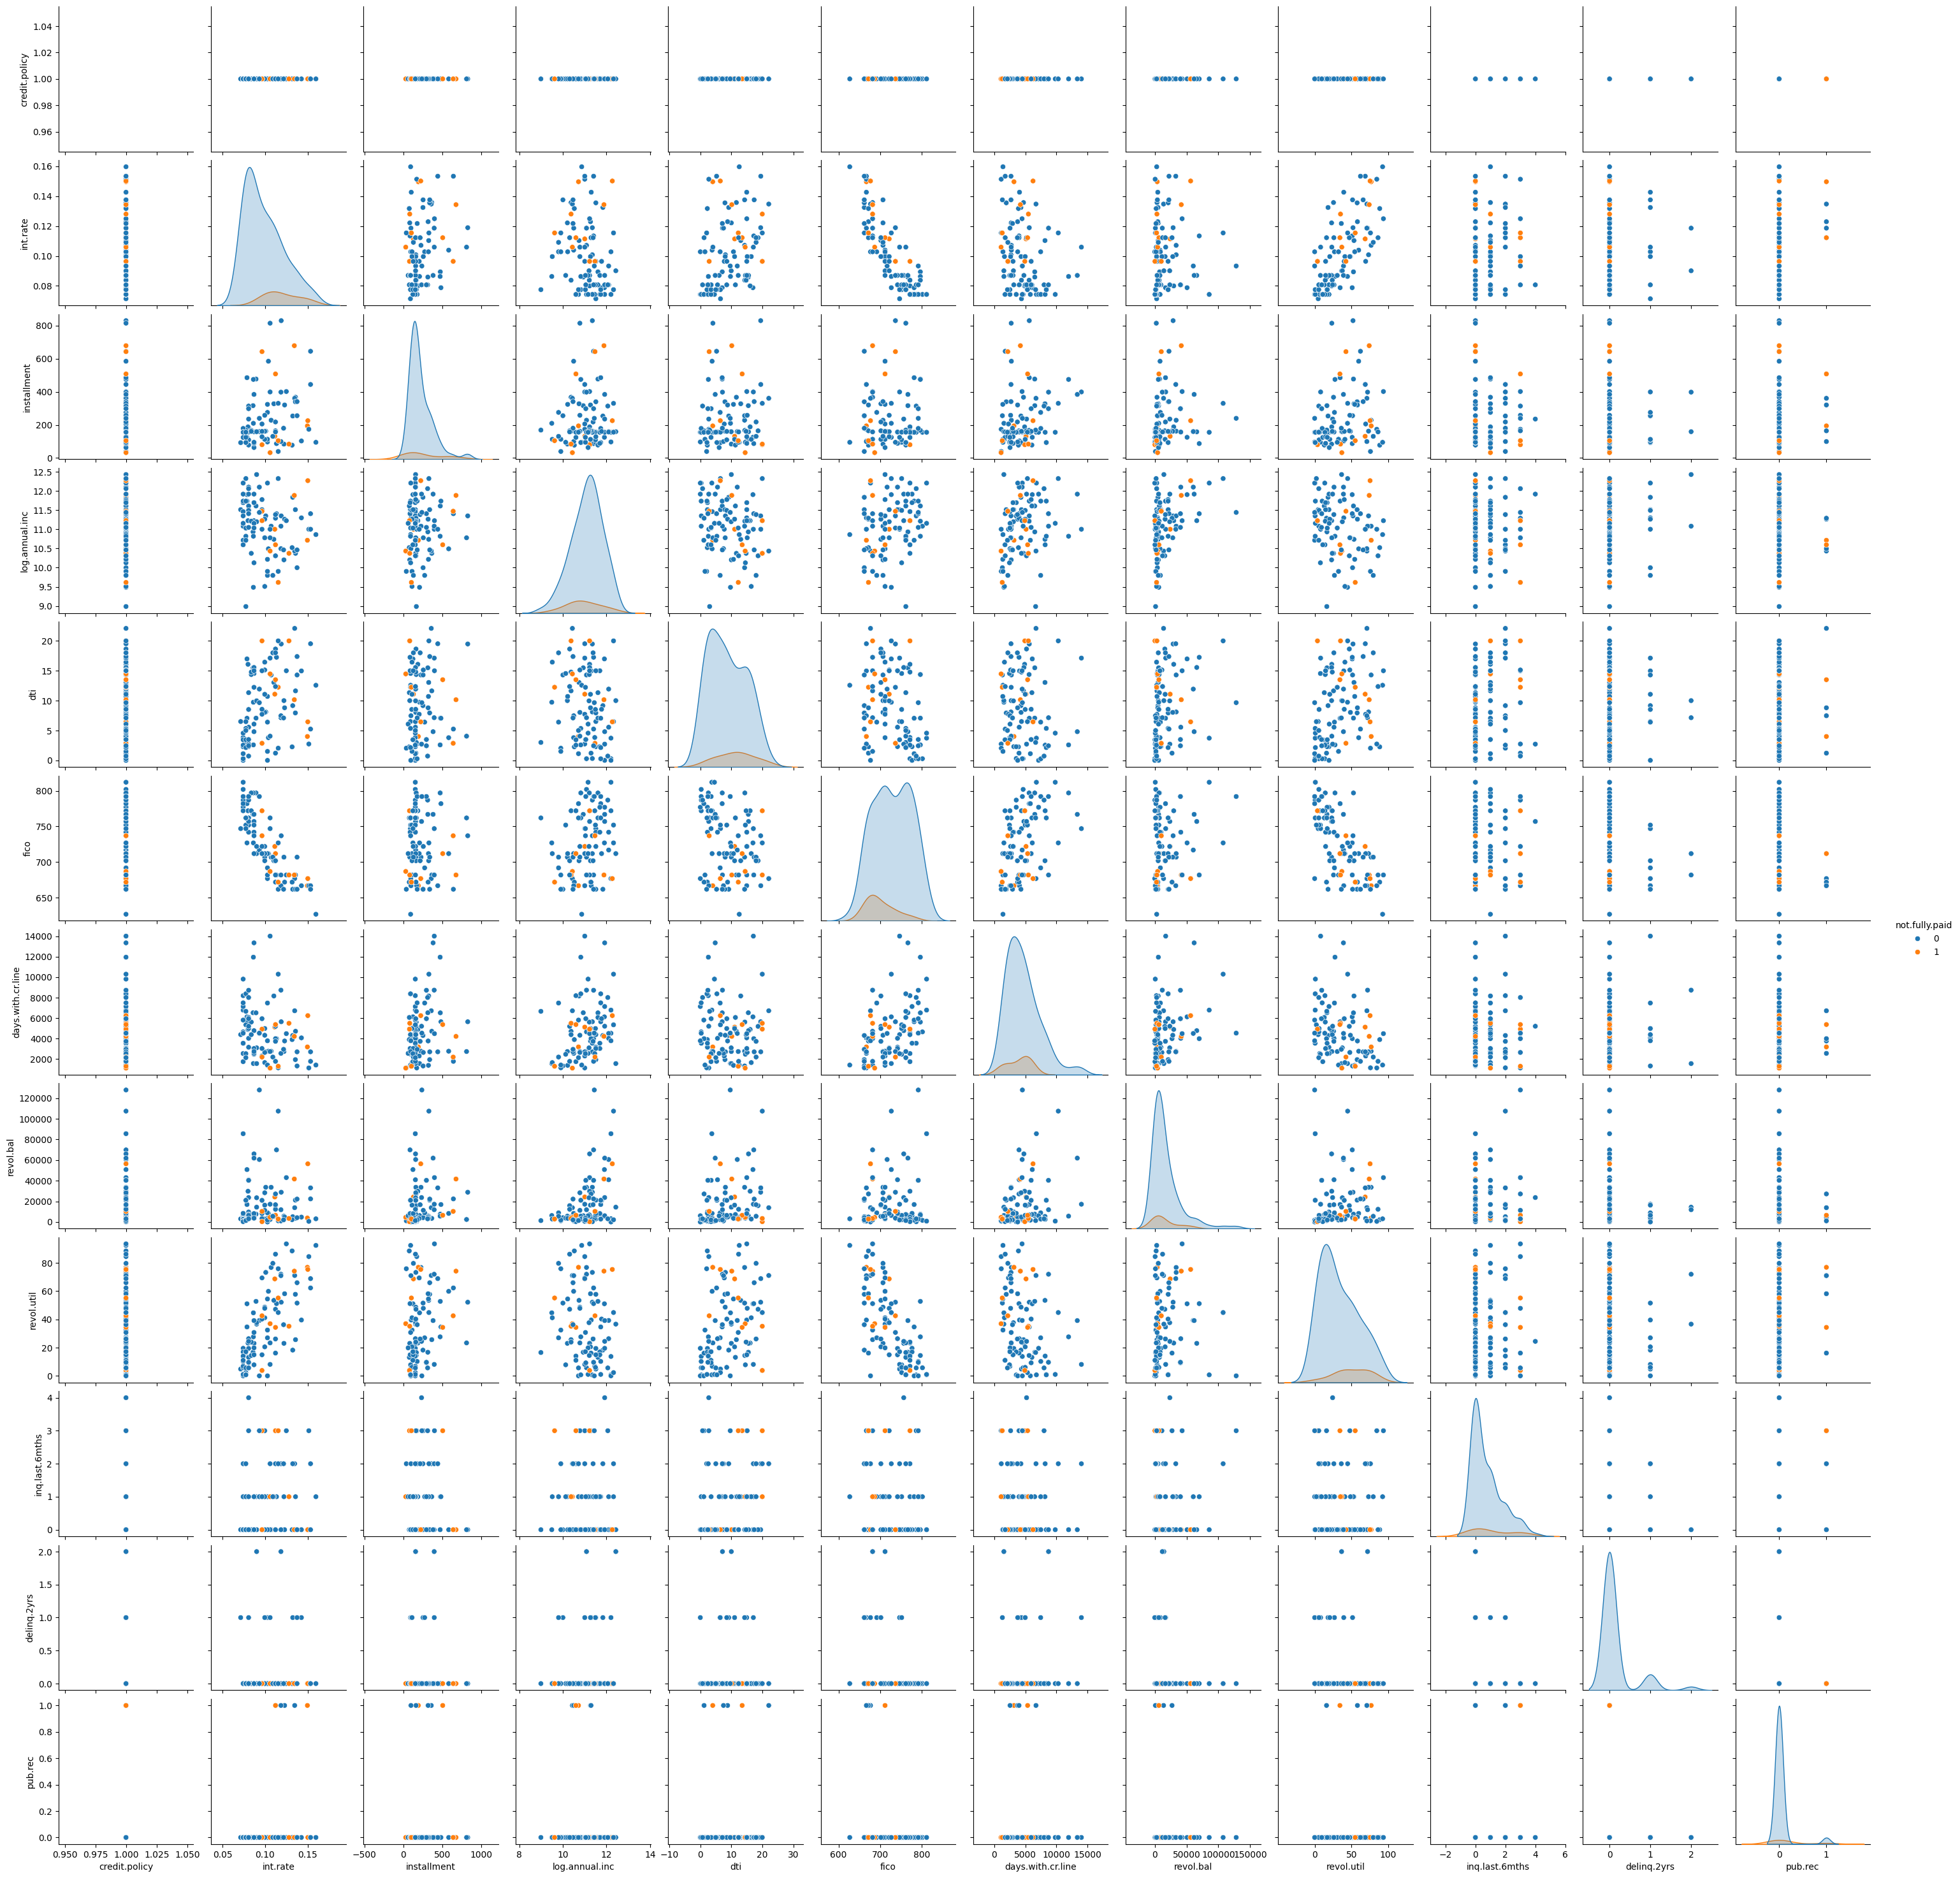

In [36]:
# Identify patterns in the data
sns.pairplot(data, hue='not.fully.paid')
plt.show()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
%matplotlib inline

In [ ]:
loans = pd.read_csv('/content/datacamp_workspace_export_2024-04-01 19_32_28.csv')

In [ ]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loans.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      5 non-null      int64  
 1   purpose            5 non-null      object 
 2   int.rate           5 non-null      float64
 3   installment        5 non-null      float64
 4   log.annual.inc     5 non-null      float64
 5   dti                5 non-null      float64
 6   fico               5 non-null      int64  
 7   days.with.cr.line  5 non-null      float64
 8   revol.bal          5 non-null      int64  
 9   revol.util         5 non-null      float64
 10  inq.last.6mths     5 non-null      int64  
 11  delinq.2yrs        5 non-null      int64  
 12  pub.rec            5 non-null      int64  
 13  not.fully.paid     5 non-null      int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 688.0+ bytes


In [ ]:
loans.head().shape

(5, 14)

In [ ]:
loans.head().describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0
mean,1.0,0.121020,337.888000,11.091236,13.694000,701.000000,3975.183333,20879.000000,53.420000,0.400000,0.200000,0.0,0.0
std,0.0,0.017947,291.625932,0.416248,4.213494,27.248853,1267.137358,15424.476085,21.809791,0.547723,0.447214,0.0,0.0
min,1.0,0.100800,102.920000,10.373491,8.100000,667.000000,2699.958333,3511.000000,25.600000,0.000000,0.000000,0.0,0.0
25%,1.0,0.107100,162.340000,11.082143,11.630000,682.000000,2760.000000,4740.000000,39.500000,0.000000,0.000000,0.0,0.0
50%,1.0,0.118900,228.220000,11.299732,14.290000,707.000000,4066.000000,28854.000000,52.100000,0.000000,0.000000,0.0,0.0
75%,1.0,0.135700,366.860000,11.350407,14.970000,712.000000,4710.000000,33623.000000,73.200000,1.000000,0.000000,0.0,0.0
max,1.0,0.142600,829.100000,11.350407,19.480000,737.000000,5639.958333,33667.000000,76.700000,1.000000,1.000000,0.0,0.0


Text(0.5, 0, 'FICO')

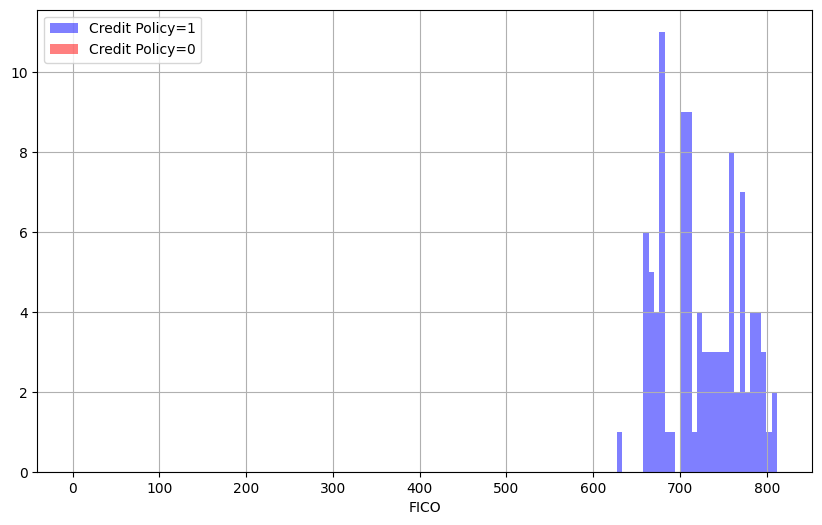

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

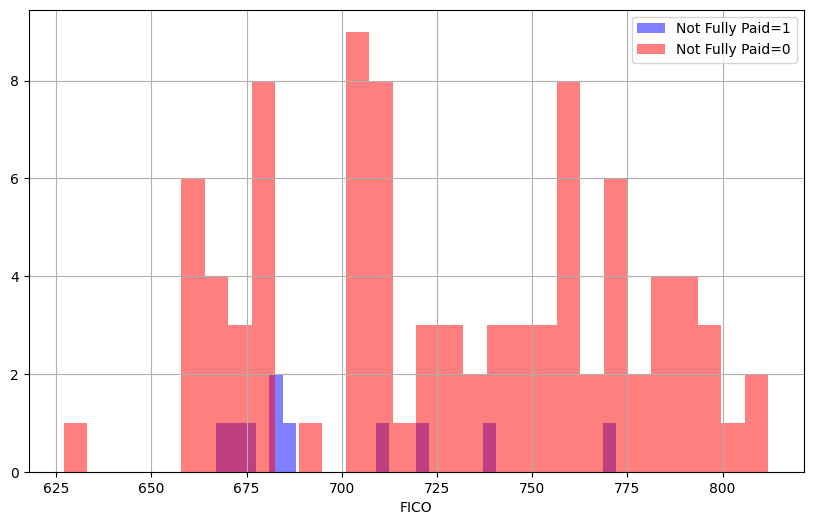

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Not Fully Paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Not Fully Paid=0')
plt.legend()
plt.xlabel('FICO')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
loans = pd.read_csv("/content/datacamp_workspace_export_2024-04-01 19_32_28.csv")

<Axes: xlabel='purpose', ylabel='count'>

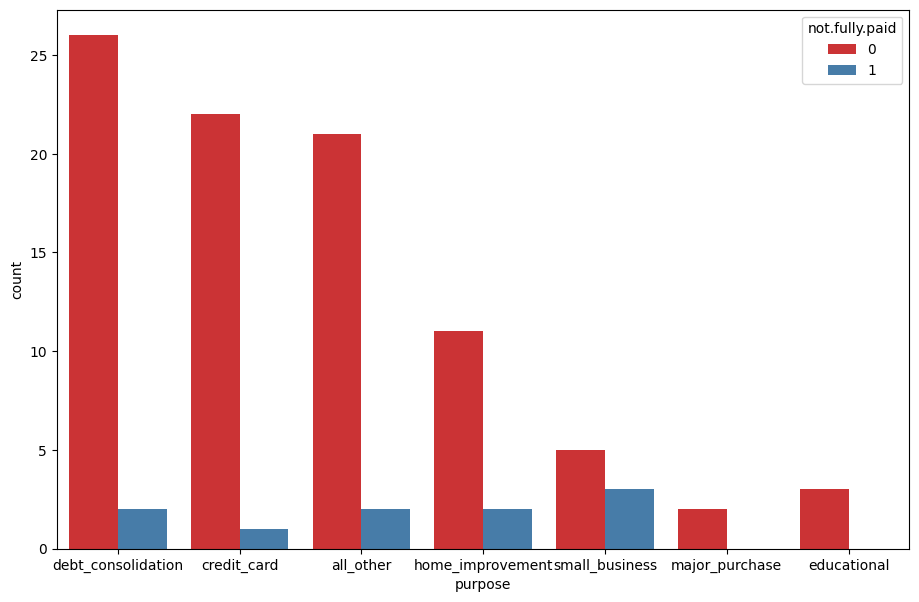

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x="purpose", hue="not.fully.paid", data=loans, palette="Set1")

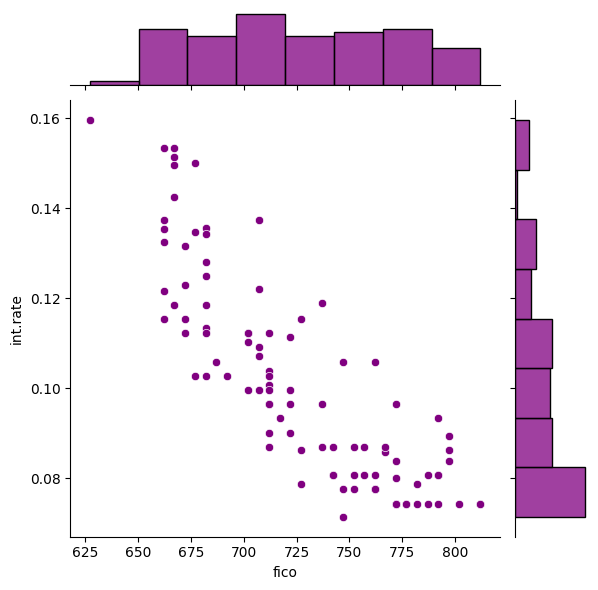

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 1100x700 with 0 Axes>

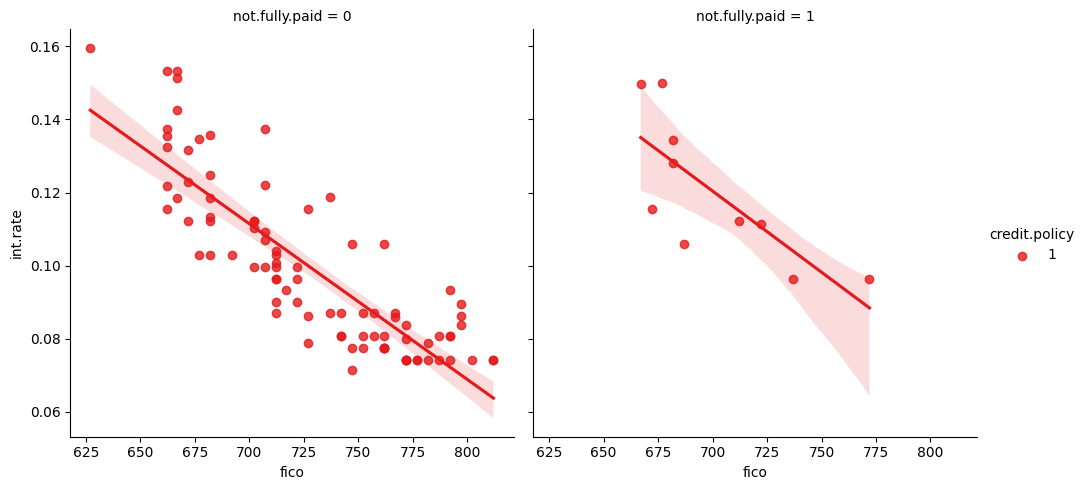

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      100 non-null    int64  
 1   purpose            100 non-null    object 
 2   int.rate           100 non-null    float64
 3   installment        100 non-null    float64
 4   log.annual.inc     100 non-null    float64
 5   dti                100 non-null    float64
 6   fico               100 non-null    int64  
 7   days.with.cr.line  100 non-null    float64
 8   revol.bal          100 non-null    int64  
 9   revol.util         100 non-null    float64
 10  inq.last.6mths     100 non-null    int64  
 11  delinq.2yrs        100 non-null    int64  
 12  pub.rec            100 non-null    int64  
 13  not.fully.paid     100 non-null    int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 11.1+ KB


In [ ]:
loan_purpose=['purpose']

In [ ]:
final_data=pd.get_dummies(loans,columns=loan_purpose,drop_first=True)

In [ ]:
# In the above code, drop_first is done to avoid multi-colinearity
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               100 non-null    int64  
 1   int.rate                    100 non-null    float64
 2   installment                 100 non-null    float64
 3   log.annual.inc              100 non-null    float64
 4   dti                         100 non-null    float64
 5   fico                        100 non-null    int64  
 6   days.with.cr.line           100 non-null    float64
 7   revol.bal                   100 non-null    int64  
 8   revol.util                  100 non-null    float64
 9   inq.last.6mths              100 non-null    int64  
 10  delinq.2yrs                 100 non-null    int64  
 11  pub.rec                     100 non-null    int64  
 12  not.fully.paid              100 non-null    int64  
 13  purpose_credit_card         100 non-

In [ ]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/datacamp_workspace_export_2024-04-01 19_32_28.csv')

In [ ]:
data['new_feature'] = data['dti'] * data['fico']

In [ ]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,new_feature
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,14356.76
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,10103.03
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,7931.66
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,5767.20
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,9984.99


In [ ]:
X = final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Instantiating Decision Tree model (basically creating a decision tree object)
dtree = DecisionTreeClassifier()
# Training or fitting the model on training data
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree_predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.00      0.00      0.00         3

    accuracy                           0.83        30
   macro avg       0.45      0.46      0.45        30
weighted avg       0.80      0.83      0.82        30



In [ ]:
print(confusion_matrix(y_test,dtree_predictions))

[[25  2]
 [ 3  0]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiating Random Forest model (basically creating a random forest object)
rfc = RandomForestClassifier(n_estimators=300)
# Training or fitting the model on training data
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
rfc_predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       0.00      0.00      0.00         3

    accuracy                           0.90        30
   macro avg       0.45      0.50      0.47        30
weighted avg       0.81      0.90      0.85        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test,rfc_predictions))

[[27  0]
 [ 3  0]]


In [7]:
!pip install scikit-learn

In [8]:
from sklearn.model_selection import GridSearchCV

In [13]:
# Define the best_model variable (replace this with your actual model)
best_model = ...

# Save the best model to disk
joblib.dump(best_model, 'loan_classifier.joblib')

['loan_classifier.joblib']

In [17]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.4 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5

In [18]:
import gradio as gr
import joblib
# Load the trained model
model = joblib.load("loan_classifier.joblib")


def predict_loan_status(
    int_rate,
    installment,
    log_annual_inc,
    dti,
    fico,
    revol_bal,
    revol_util,
    inq_last_6mths,
    delinq_2yrs,
    pub_rec,

):
    input_dict = {
        "int.rate": int_rate,
        "installment": installment,
        "log.annual.inc": log_annual_inc,
        "dti": dti,
        "fico": fico,
        "revol.bal": revol_bal,
        "revol.util": revol_util,
        "inq.last.6mths": inq_last_6mths,
        "delinq.2yrs": delinq_2yrs,
        "pub.rec": pub_rec,

    }
    # Convert the dictionary to a 2D array
    input_array = [list(input_dict.values())]
    prediction = model.predict(input_array)[0]

    if prediction == 0:
        return "Loan fully paid"
    else:
        return "Loan not fully paid"


inputs = [
    gr.Slider(0.06, 0.23, step=0.01, label="Interest Rate"),
    gr.Slider(100, 950, step=10, label="Installment"),
    gr.Slider(7, 15, step=0.1, label="Log Annual Income"),
    gr.Slider(0, 40, step=1, label="DTI Ratio"),
    gr.Slider(600, 850, step=1, label="FICO Score"),
    gr.Slider(0, 120000, step=1000, label="Revolving Balance"),
    gr.Slider(0, 120, step=1, label="Revolving Utilization"),
    gr.Slider(0, 10, step=1, label="Inquiries in Last 6 Months"),
    gr.Slider(0, 20, step=1, label="Delinquencies in Last 2 Years"),
    gr.Slider(0, 10, step=1, label="Public Records"),

]
outputs = [gr.Label(num_top_classes=2)]

title = "Loan Approval Classifier"
description = (
    "Enter the details of the loan applicant to check if the loan is approved or not."
)
gr.Interface(
    fn=predict_loan_status,
    inputs=inputs,
    outputs=outputs,
    title=title,
    description=description,
).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1ff2cd0ec7a04f5a83.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [24]:
import pandas as pd

In [25]:
loan_df = pd.read_csv("/content/datacamp_workspace_export_2024-04-01 19_32_28.csv")

In [23]:
# Perform feature engineering
loan_df["installment_to_income_ratio"] = (
    loan_df["installment"] / loan_df["log.annual.inc"]
)
loan_df["credit_history"] = (loan_df["delinq.2yrs"] + loan_df["pub.rec"]) / loan_df[
    "fico"
]